In [ ]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [ ]:
# Load data from CSV file
df = pd.read_excel('/content/drive/MyDrive/HK6/PTDLKD/đồ án/ETHUSDT.xlsx')
# Convert Close time column to date format
df["Close time"] = pd.to_datetime(df["Close time"], format="%d-%m-%Y")
# Sort data by Close time column
df = df.sort_values("Close time")
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

,Close
0,134.85
1,135.98
2,137.28
3,136.09
4,133.98
...,...
1495,1749.57
1496,1741.88
1497,1773.88
1498,1715.22


In [ ]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
df

,Close
0,134.85
1,135.98
2,137.28
3,136.09
4,133.98
...,...
1495,1749.57
1496,1741.88
1497,1773.88
1498,1715.22


In [ ]:
from pandas.core.indexers.utils import Any
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [ ]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [ ]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[5264.24568549 5268.35181908 5272.45795268 5276.56408628 5280.67021987
 5284.77635347 5288.88248707 5292.98862066 5297.09475426 5301.20088786
 5305.30702145 5309.41315505 5313.51928865 5317.62542224 5321.73155584
 5325.83768944 5329.94382303 5334.04995663 5338.15609023 5342.26222382
 5346.36835742 5350.47449102 5354.58062461 5358.68675821 5362.79289181
 5366.8990254  5371.005159   5375.1112926  5379.21742619 5383.32355979]


In [ ]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)


Validation RMSE: 3505.438173343846
Testing RMSE: 2189.12491295047


Validation RMSE: 3505.438173343846
Testing RMSE: 2189.12491295047


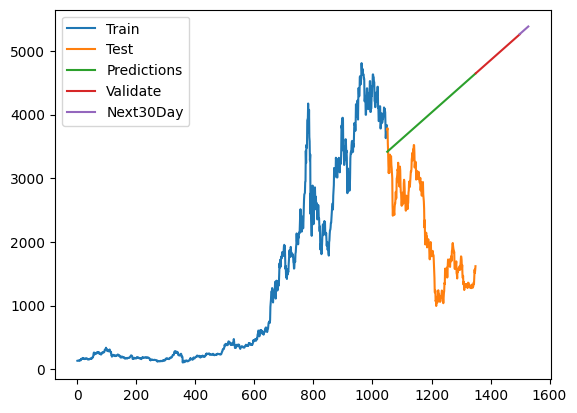

In [ ]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [ ]:
test_data.index

RangeIndex(start=1050, stop=1350, step=1)